In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io

In [161]:
# Đọc file "Hospital ER_Data.csv" .
df = pd.read_csv('Hospital ER_Data.csv')
df.head(2)

,Patient Id,Patient Admission Date,Patient First Inital,Patient Last Name,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime,Patients CM
0,145-39-5406,20-03-2024 08:47,H,Glasspool,M,69,White,NaN,False,10.0,39,0
1,316-34-3057,15-06-2024 11:29,X,Methuen,M,4,Native American/Alaska Native,NaN,True,NaN,27,0


In [122]:
# 2. Xử lý và Làm sạch Dữ liệu

In [123]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient Id                  9216 non-null   object 
 1   Patient Admission Date      9216 non-null   object 
 2   Patient First Inital        9216 non-null   object 
 3   Patient Last Name           9216 non-null   object 
 4   Patient Gender              9216 non-null   object 
 5   Patient Age                 9216 non-null   int64  
 6   Patient Race                9216 non-null   object 
 7   Department Referral         3816 non-null   object 
 8   Patient Admission Flag      9216 non-null   bool   
 9   Patient Satisfaction Score  2517 non-null   float64
 10  Patient Waittime            9216 non-null   int64  
 11  Patients CM                 9216 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 801.1+ KB


In [124]:
df.describe()


,Patient Age,Patient Satisfaction Score,Patient Waittime,Patients CM
count,9216.000000,2517.000000,9216.000000,9216.000000
mean,39.855143,4.992054,35.259874,0.052083
std,22.755125,3.138043,14.735323,0.222207
min,1.000000,0.000000,10.000000,0.000000
25%,20.000000,2.000000,23.000000,0.000000
50%,39.000000,5.000000,35.000000,0.000000
75%,60.000000,8.000000,48.000000,0.000000
max,79.000000,10.000000,60.000000,1.000000


In [125]:
df.shape


(9216, 12)

In [126]:
df.duplicated().any()

np.False_

In [127]:
df.isnull().sum()

Patient Id                       0
Patient Admission Date           0
Patient First Inital             0
Patient Last Name                0
Patient Gender                   0
Patient Age                      0
Patient Race                     0
Department Referral           5400
Patient Admission Flag           0
Patient Satisfaction Score    6699
Patient Waittime                 0
Patients CM                      0
dtype: int64

In [128]:
df.columns

Index(['Patient Id', 'Patient Admission Date', 'Patient First Inital',
       'Patient Last Name', 'Patient Gender', 'Patient Age', 'Patient Race',
       'Department Referral', 'Patient Admission Flag',
       'Patient Satisfaction Score', 'Patient Waittime', 'Patients CM'],
      dtype='object')

In [129]:

# Chuẩn hóa tên cột: Loại bỏ khoảng trắng thừa và chuyển thành chữ in thường để dễ thao tác
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Chuyển đổi kiểu dữ liệu cho các cột
# Giả sử cột ngày tháng có tên là 'patient_admission_date' sau khi chuẩn hóa
df['patient_admission_date'] = pd.to_datetime(df['patient_admission_date'], errors='coerce')
df['patient_satisfaction_score'] = pd.to_numeric(df['patient_satisfaction_score'], errors='coerce')
df['patient_admission_flag'] = (df['patient_admission_flag'].astype(str).str.upper() == 'TRUE')


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17560\2217262198.py:6: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['patient_admission_date'] = pd.to_datetime(df['patient_admission_date'], errors='coerce')


In [130]:

print("\n--- Dữ liệu sau khi xử lý ---")
df.head(2)


--- Dữ liệu sau khi xử lý ---


,patient_id,patient_admission_date,patient_first_inital,patient_last_name,patient_gender,patient_age,patient_race,department_referral,patient_admission_flag,patient_satisfaction_score,patient_waittime,patients_cm
0,145-39-5406,2024-03-20 08:47:00,H,Glasspool,M,69,White,NaN,False,10.0,39,0
1,316-34-3057,2024-06-15 11:29:00,X,Methuen,M,4,Native American/Alaska Native,NaN,True,NaN,27,0


In [131]:
# KPI 
print("\nCÁC CHỈ SỐ TỔNG QUAN (KPIs)")
total_patients = df['patient_id'].nunique()
print(f"1. Tổng số bệnh nhân: {total_patients}")

average_age = round(df['patient_age'].mean(), 1)
print(f"2. Tuổi trung bình của bệnh nhân: {average_age}")

average_satisfaction = round(df['patient_satisfaction_score'].mean(), 3)
print(f"3. Mức độ hài lòng trung bình: {average_satisfaction}")

average_wait_time_mins = round(df['patient_waittime'].mean(), 2)
print(f"4. Thời gian chờ trung bình: {average_wait_time_mins} phút")


CÁC CHỈ SỐ TỔNG QUAN (KPIs)
1. Tổng số bệnh nhân: 9216
2. Tuổi trung bình của bệnh nhân: 39.9
3. Mức độ hài lòng trung bình: 4.992
4. Thời gian chờ trung bình: 35.26 phút



5. Số lượng bệnh nhân theo Giới tính:
   Giới Tính  Số Lượng
0         M      4705
1         F      4487
2        NC        24


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17560\746197766.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=patients_by_gender, x='Giới Tính', y='Số Lượng', palette='Set2')


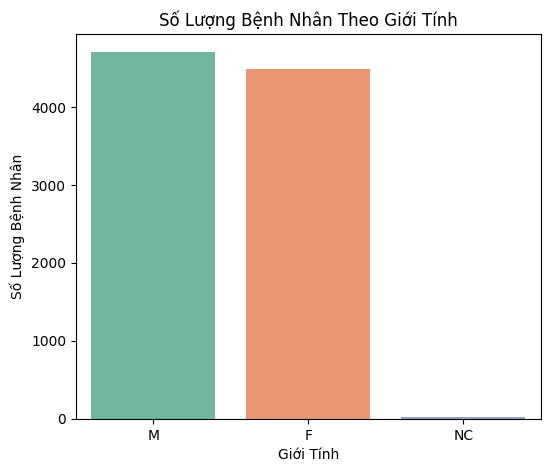

In [132]:

# Đếm số lượng bệnh nhân theo giới tính
patients_by_gender = df['patient_gender'].value_counts().reset_index()
patients_by_gender.columns = ['Giới Tính', 'Số Lượng']

# In thông tin
print("\n5. Số lượng bệnh nhân theo Giới tính:\n", patients_by_gender)

# Vẽ biểu đồ
plt.figure(figsize=(6, 5))
sns.barplot(data=patients_by_gender, x='Giới Tính', y='Số Lượng', palette='Set2')
plt.title('Số Lượng Bệnh Nhân Theo Giới Tính')
plt.xlabel('Giới Tính')
plt.ylabel('Số Lượng Bệnh Nhân')
plt.show()


In [133]:
# Bệnh nhân theo Khoa 
total_departments = df['department_referral'].nunique()
patients_by_department = df['department_referral'].value_counts()
print(f"\nTổng số khoa: {total_departments}")
print("\nSố lượng bệnh nhân theo Khoa:\n", patients_by_department)


Tổng số khoa: 7

Số lượng bệnh nhân theo Khoa:
 department_referral
General Practice    1840
Orthopedics          995
Physiotherapy        276
Cardiology           248
Neurology            193
Gastroenterology     178
Renal                 86
Name: count, dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17560\3921660074.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=patients_by_department.index, x=patients_by_department.values,palette='Set2')


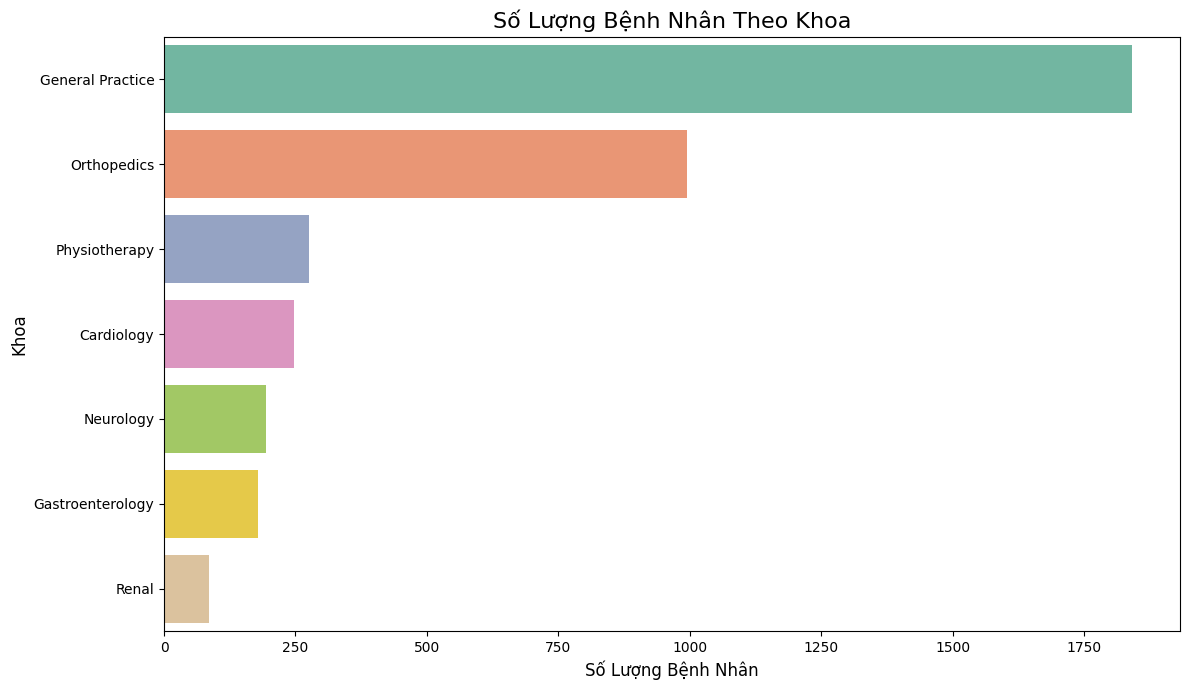

In [134]:
plt.figure(figsize=(12, 7))
sns.barplot(y=patients_by_department.index, x=patients_by_department.values,palette='Set2')
plt.title('Số Lượng Bệnh Nhân Theo Khoa', fontsize=16)
plt.xlabel('Số Lượng Bệnh Nhân', fontsize=12)
plt.ylabel('Khoa', fontsize=12)
plt.tight_layout()
plt.savefig('patients_by_department.png')
plt.show()

In [135]:
#KPI 8: Bệnh nhân nhập viện
admissions = df['patient_admission_flag'].value_counts()
admissions.index = admissions.index.map({True: 'Nhập viện', False: 'Không Nhập viện'})
print("\n8. Thống kê bệnh nhân Nhập viện vs. Không nhập viện:\n", admissions)



8. Thống kê bệnh nhân Nhập viện vs. Không nhập viện:
 patient_admission_flag
Nhập viện          4612
Không Nhập viện    4604
Name: count, dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17560\3104081830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=admissions.index, y=admissions.values, palette='Set2')


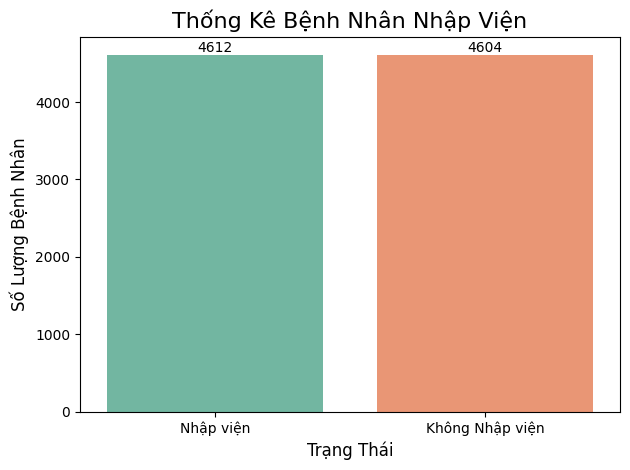

In [148]:
plt.figure()
sns.barplot(x=admissions.index, y=admissions.values, palette='Set2')
plt.title('Thống Kê Bệnh Nhân Nhập Viện', fontsize=16)
plt.xlabel('Trạng Thái', fontsize=12)
plt.ylabel('Số Lượng Bệnh Nhân', fontsize=12)
for i, value in enumerate(admissions.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [137]:
 #KPI 9: Số bệnh nhân theo độ tuổi
age_bins = [-1, 9, 19, 29, 49, 79, np.inf]
age_labels = ['Children', 'Teenagers', 'Young Adults', 'Middle_aged Adults', 'Seniors', 'Very Elderly']
df['age_group'] = pd.cut(df['patient_age'], bins=age_bins, labels=age_labels, right=True)
patients_by_age_group = df['age_group'].value_counts().reindex(age_labels)
print("\n9. Số bệnh nhân theo nhóm tuổi:\n", patients_by_age_group)



9. Số bệnh nhân theo nhóm tuổi:
 age_group
Children              1056
Teenagers             1179
Young Adults          1188
Middle_aged Adults    2335
Seniors               3458
Very Elderly             0
Name: count, dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17560\3884001930.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=patients_by_age_group.index, y=patients_by_age_group.values, palette='Set2')


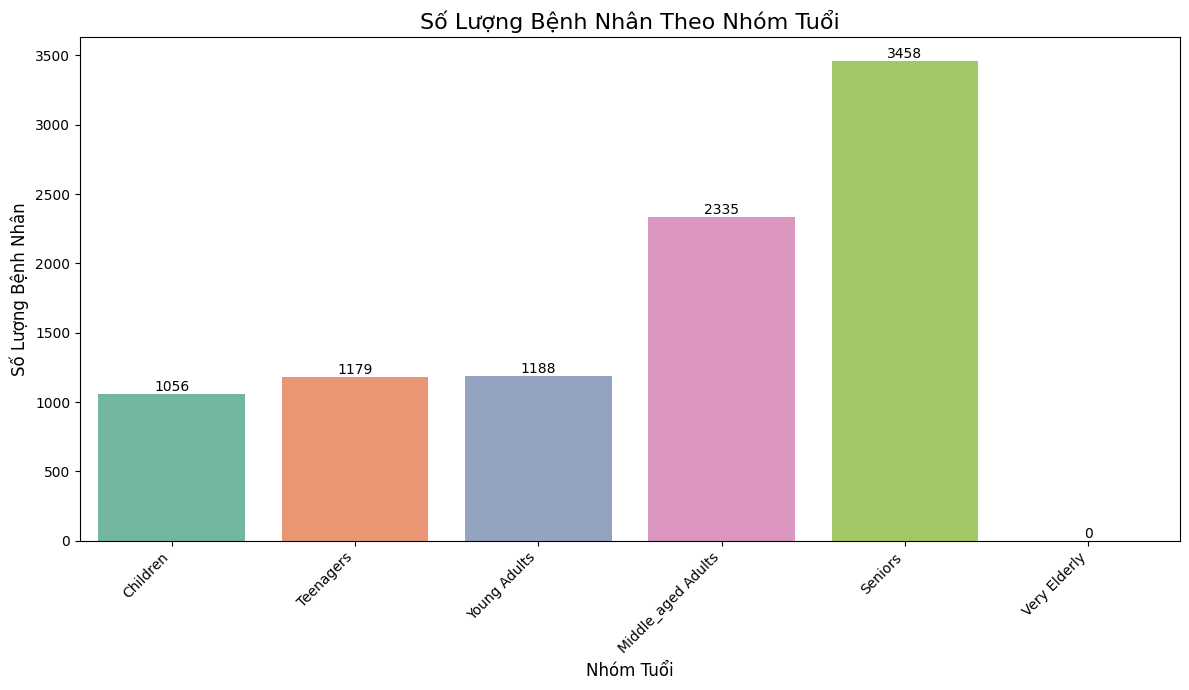

In [147]:
plt.figure(figsize=(12, 7))
sns.barplot(x=patients_by_age_group.index, y=patients_by_age_group.values, palette='Set2')
plt.title('Số Lượng Bệnh Nhân Theo Nhóm Tuổi', fontsize=16)
plt.xlabel('Nhóm Tuổi', fontsize=12)
plt.ylabel('Số Lượng Bệnh Nhân', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(patients_by_age_group.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [139]:
#KPI 10: Số bệnh nhân theo thứ trong tuần
df['day_of_week'] = df['patient_admission_date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
patients_by_day = df['day_of_week'].value_counts().reindex(day_order)
print("\n10. Số bệnh nhân theo thứ trong tuần:\n", patients_by_day)



10. Số bệnh nhân theo thứ trong tuần:
 day_of_week
Monday       1314
Tuesday      1305
Wednesday    1260
Thursday     1332
Friday       1310
Saturday     1377
Sunday       1318
Name: count, dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17560\283080156.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=patients_by_day.index, y=patients_by_day.values, palette='Set2')


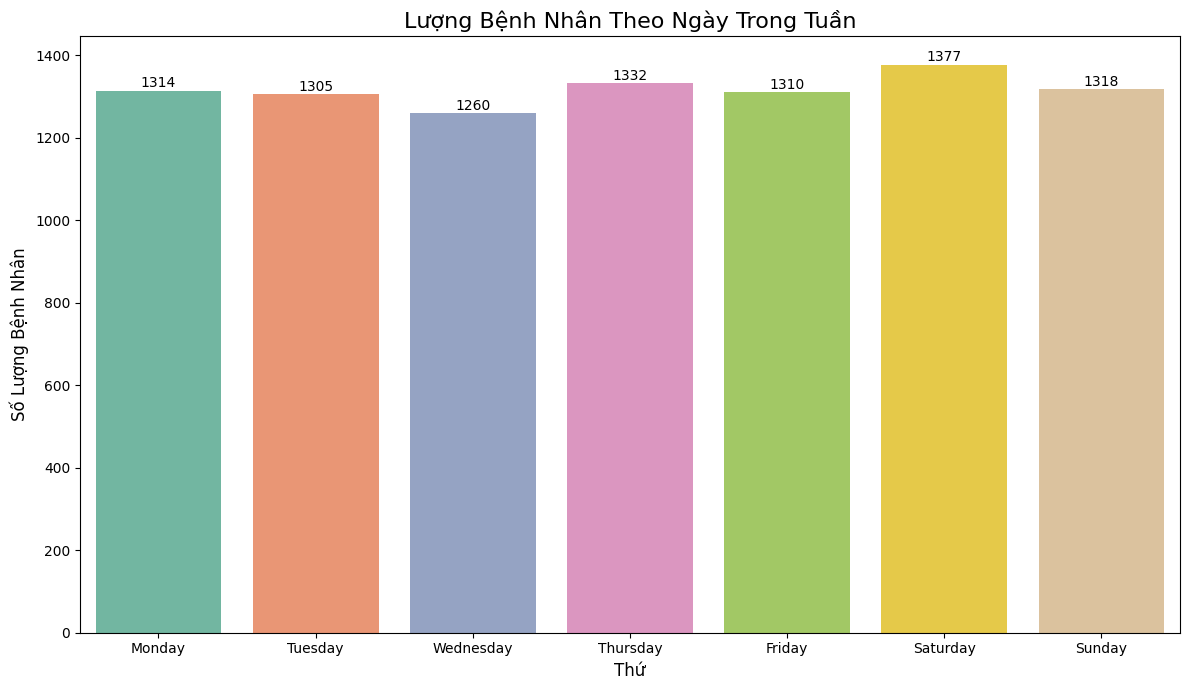

In [149]:
plt.figure(figsize=(12, 7))
sns.barplot(x=patients_by_day.index, y=patients_by_day.values, palette='Set2')
plt.title('Lượng Bệnh Nhân Theo Ngày Trong Tuần', fontsize=16)
plt.xlabel('Thứ', fontsize=12)
plt.ylabel('Số Lượng Bệnh Nhân', fontsize=12)
for i, value in enumerate(patients_by_day.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [156]:
# KPI 11: Thống kê dữ liệu theo từng tháng ---
df['visit_year'] = df['patient_admission_date'].dt.year
df['visit_month'] = df['patient_admission_date'].dt.month
df['age_group'] = pd.Categorical(df['age_group'], categories=age_labels, ordered=True)

monthly_stats = df.groupby(['visit_year', 'visit_month', 'age_group']).agg(
        total_patients=('patient_id', 'count'),
        admitted=('patient_admission_flag', 'sum'),
        average_wait_time=('patient_waittime', 'mean')
    ).reset_index()
monthly_stats['not_admitted'] = monthly_stats['total_patients'] - monthly_stats['admitted']
monthly_stats['average_wait_time'] = monthly_stats['average_wait_time'].round(1)
monthly_stats = monthly_stats[monthly_stats['total_patients'] > 0].reset_index()


print("\n11. Thống kê chi tiết theo tháng và nhóm tuổi:")
monthly_stats


11. Thống kê chi tiết theo tháng và nhóm tuổi:


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17560\9000708.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_stats = df.groupby(['visit_year', 'visit_month', 'age_group']).agg(


,index,visit_year,visit_month,age_group,total_patients,admitted,average_wait_time,not_admitted
0,18,2023,4,Children,58,27,36.6,31
1,19,2023,4,Teenagers,75,39,33.9,36
2,20,2023,4,Young Adults,61,32,36.2,29
3,21,2023,4,Middle_aged Adults,103,49,35.3,54
4,22,2023,4,Seniors,182,90,34.1,92
...,...,...,...,...,...,...,...,...
90,126,2024,10,Children,70,37,32.0,33
91,127,2024,10,Teenagers,53,29,34.7,24
92,128,2024,10,Young Adults,65,41,32.3,24
93,129,2024,10,Middle_aged Adults,113,56,36.7,57


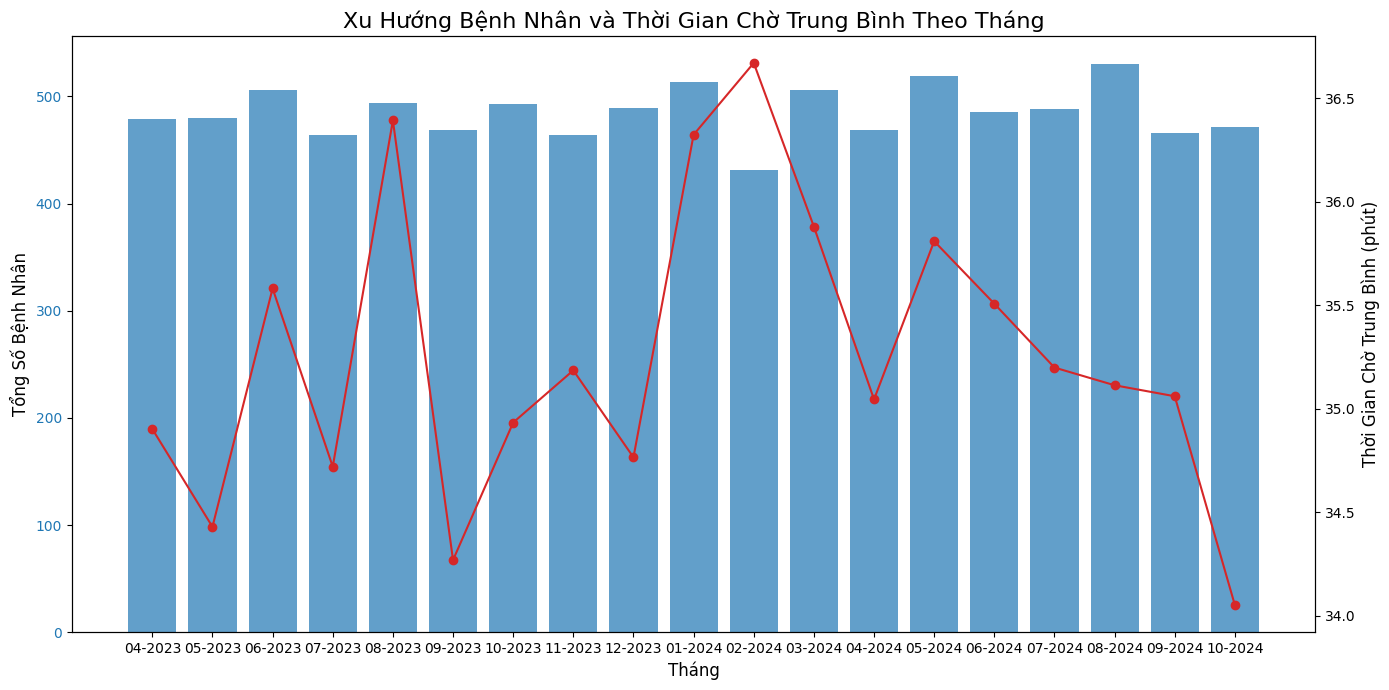

In [ ]:
# Trực quan hóa cho mục 11: Xu hướng bệnh nhân và thời gian chờ theo tháng
monthly_summary = df.groupby(['visit_year', 'visit_month']).agg(
        total_patients=('patient_id', 'count'),
        average_wait_time=('patient_waittime', 'mean')
    ).reset_index()
monthly_summary['month_label'] = monthly_summary.apply(lambda row: f"{int(row['visit_month']):02d}-{int(row['visit_year'])}", axis=1)
fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.set_xlabel('Tháng', fontsize=12)
ax1.set_ylabel('Tổng Số Bệnh Nhân', fontsize=12)
ax1.bar(monthly_summary['month_label'], monthly_summary['total_patients'], color=color1, alpha=0.7, label='Tổng Bệnh Nhân')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
ax2.set_ylabel('Thời Gian Chờ Trung Bình (phút)', fontsize=12)
ax2.plot(monthly_summary['month_label'], monthly_summary['average_wait_time'], color=color2, marker='o')

plt.title('Xu Hướng Bệnh Nhân và Thời Gian Chờ Trung Bình Theo Tháng', fontsize=16)
fig.tight_layout()
plt.show()